# Problem Statement
- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars basedon the outside air Temeperature (degC).
- You decide that a Linear Regression model might be a good candidate to solve this problem.
- <b>Data Set:</b>
    - Independant Variable X: Outside Air Temperature
    - Dependant Variable Y: Overall daily revenue generated in dollars

# 1 - Import Libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('./IceCreamData.csv')

In [58]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [59]:
data.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


# 2 - Visualization

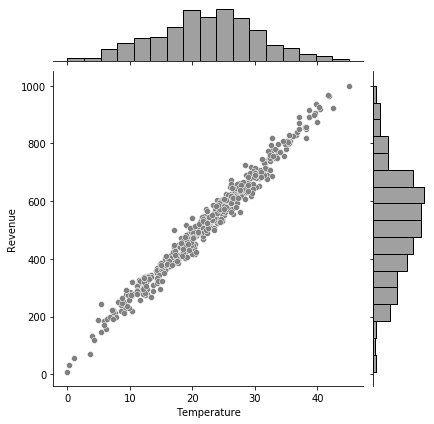

In [60]:
sns.jointplot(x='Temperature', y='Revenue', data=data, color = 'grey')

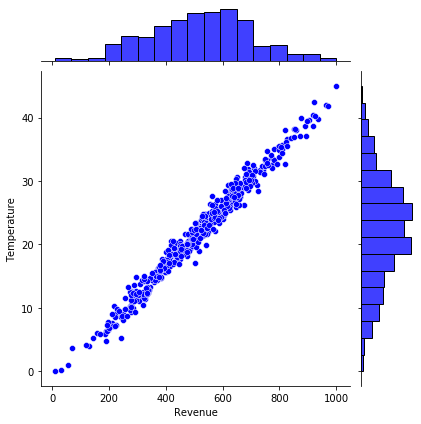

In [61]:
sns.jointplot(x='Revenue', y='Temperature', data=data, color = 'blue')

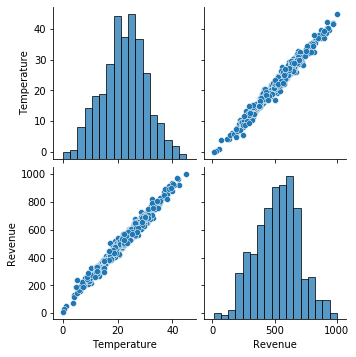

In [62]:
sns.pairplot(data)

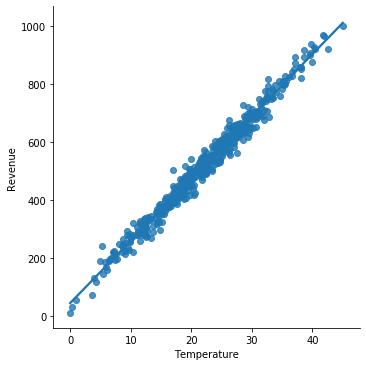

In [63]:
sns.lmplot(x='Temperature', y='Revenue', data=data)

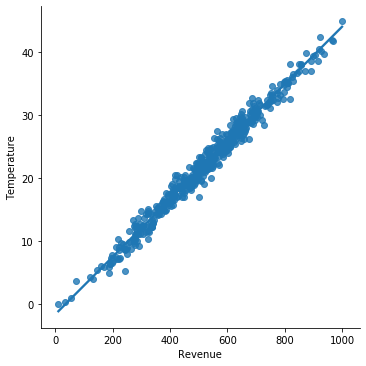

In [64]:
sns.lmplot(x='Revenue', y='Temperature', data=data)

# 3 - Divide the Data

In [65]:
X = data[['Temperature']]

In [66]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [67]:
y = data[['Revenue']]

In [68]:
y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4 - Train the Model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
# fit_intercept=True : that means you're asking the Linear Regression to obtain the 2 Parameters, 
# The Slope (m), and the (b) which is our Y-intercept
regressor = LinearRegression(fit_intercept=True)

In [73]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [[21.41933632]]
Linear Model Coefficient (b) [45.68626766]


# 5 - Test the Model

In [75]:
X_test.shape

(150, 1)

In [76]:
y_predict = regressor.predict(X_test)

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand (Training Set)')

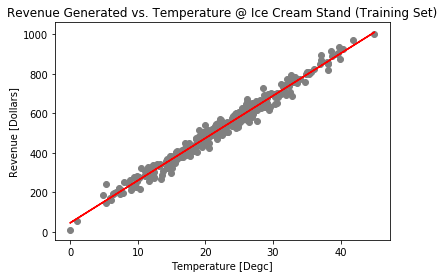

In [77]:
X_train_predict = regressor.predict(X_train)

plt.scatter(X_train, y_train, color = 'grey')
plt.plot(X_train, X_train_predict, color = 'red')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [Degc]')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand (Training Set)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand (Testing Set)')

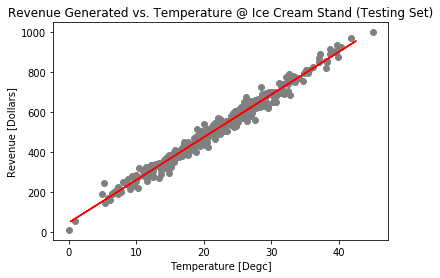

In [78]:
X_test_predict = regressor.predict(X_test)

plt.scatter(X_train, y_train, color = 'grey')
plt.plot(X_test, X_test_predict, color = 'red')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [Degc]')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand (Testing Set)')